## Predicción de Calidad del Vino (Core)
# Elida Peña

**Objetivo**

Utilizar técnicas de clasificación aprendidas hasta el momento para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

**Descripción del Dataset:** Este conjunto de datos contiene información sobre distintas características físico-químicas de muestras de vino tinto y su calidad asociada. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10.

**Instrucciones:**

 **1. Carga y Exploración de Datos:**

* Cargar el dataset y revisar su estructura básica.

* Describir las variables y su distribución.

* Identificar y tratar valores nulos y outliers.

In [15]:
import pandas as pd
# Visualización de distribuciones
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.ensemble import RandomForestClassifier

* Cargar el dataset y revisar su estructura básica.

In [5]:
#Cargar el dataset y revisar su estructura básica.
# Cargar el dataset
url = "../data/WineQT.csv"
df = pd.read_csv(url, sep=',')

# Revisar la estructura básica del dataset
print("Primeras 5 filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())  # Información sobre columnas, tipos de datos y valores nulos.

print("\nDescripción estadística básica:")
print(df.describe())  # Estadísticas básicas del dataset.


Primeras 5 filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1   

* Describir las variables y su distribución.

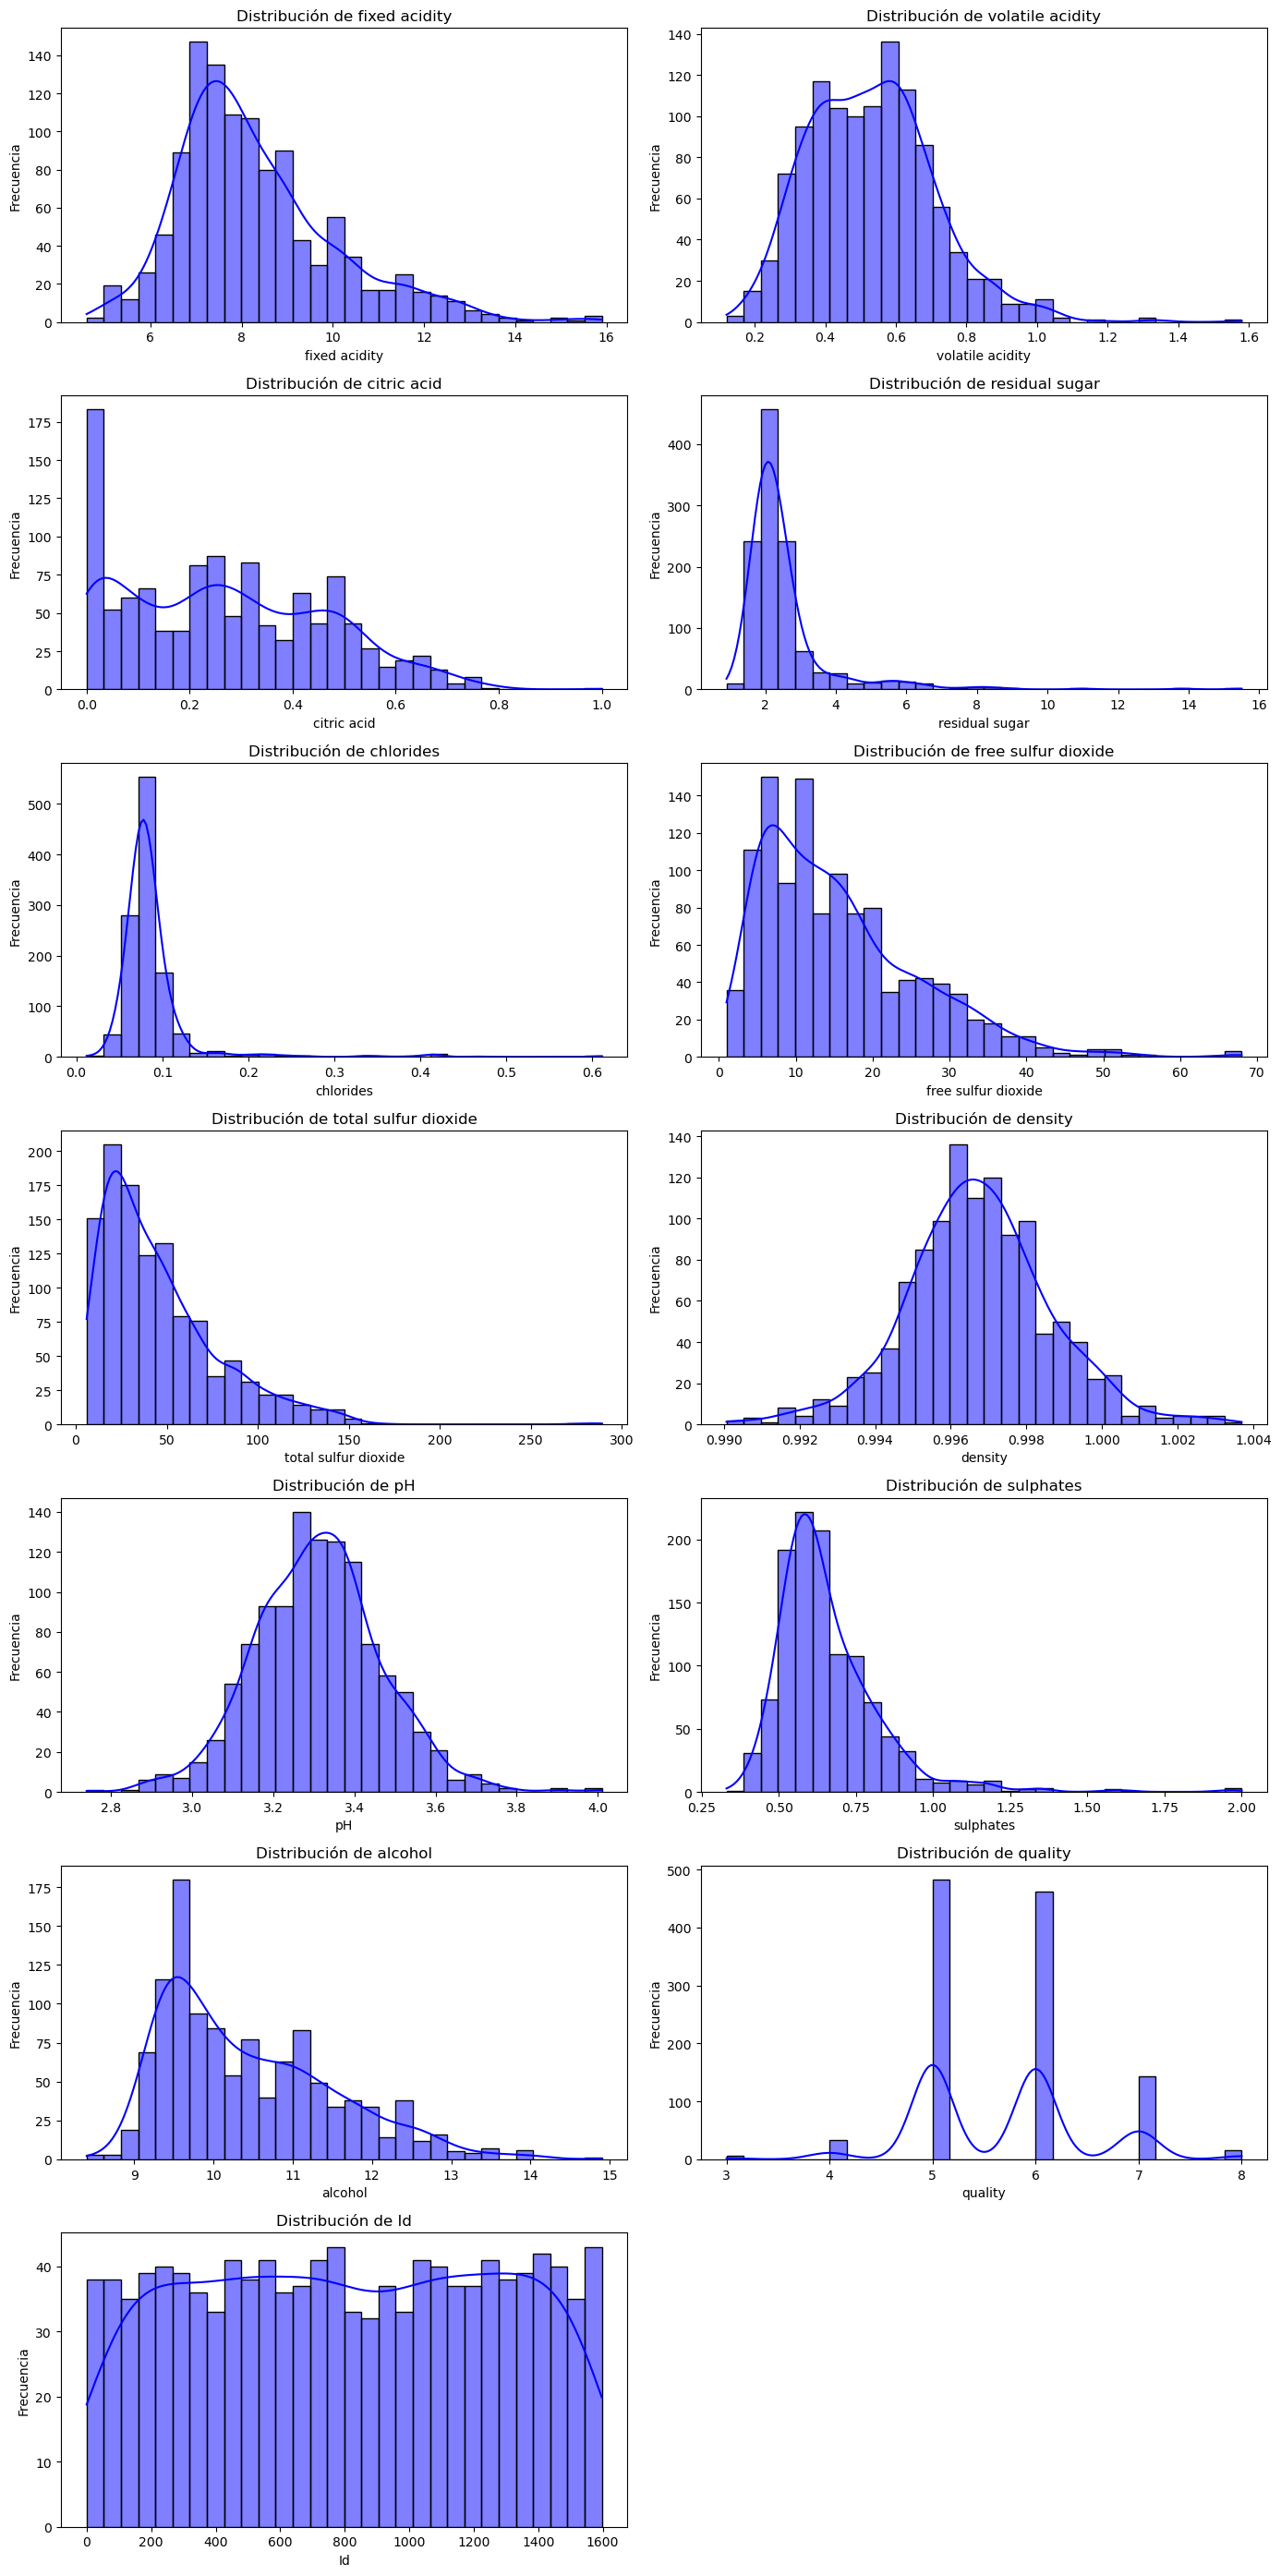

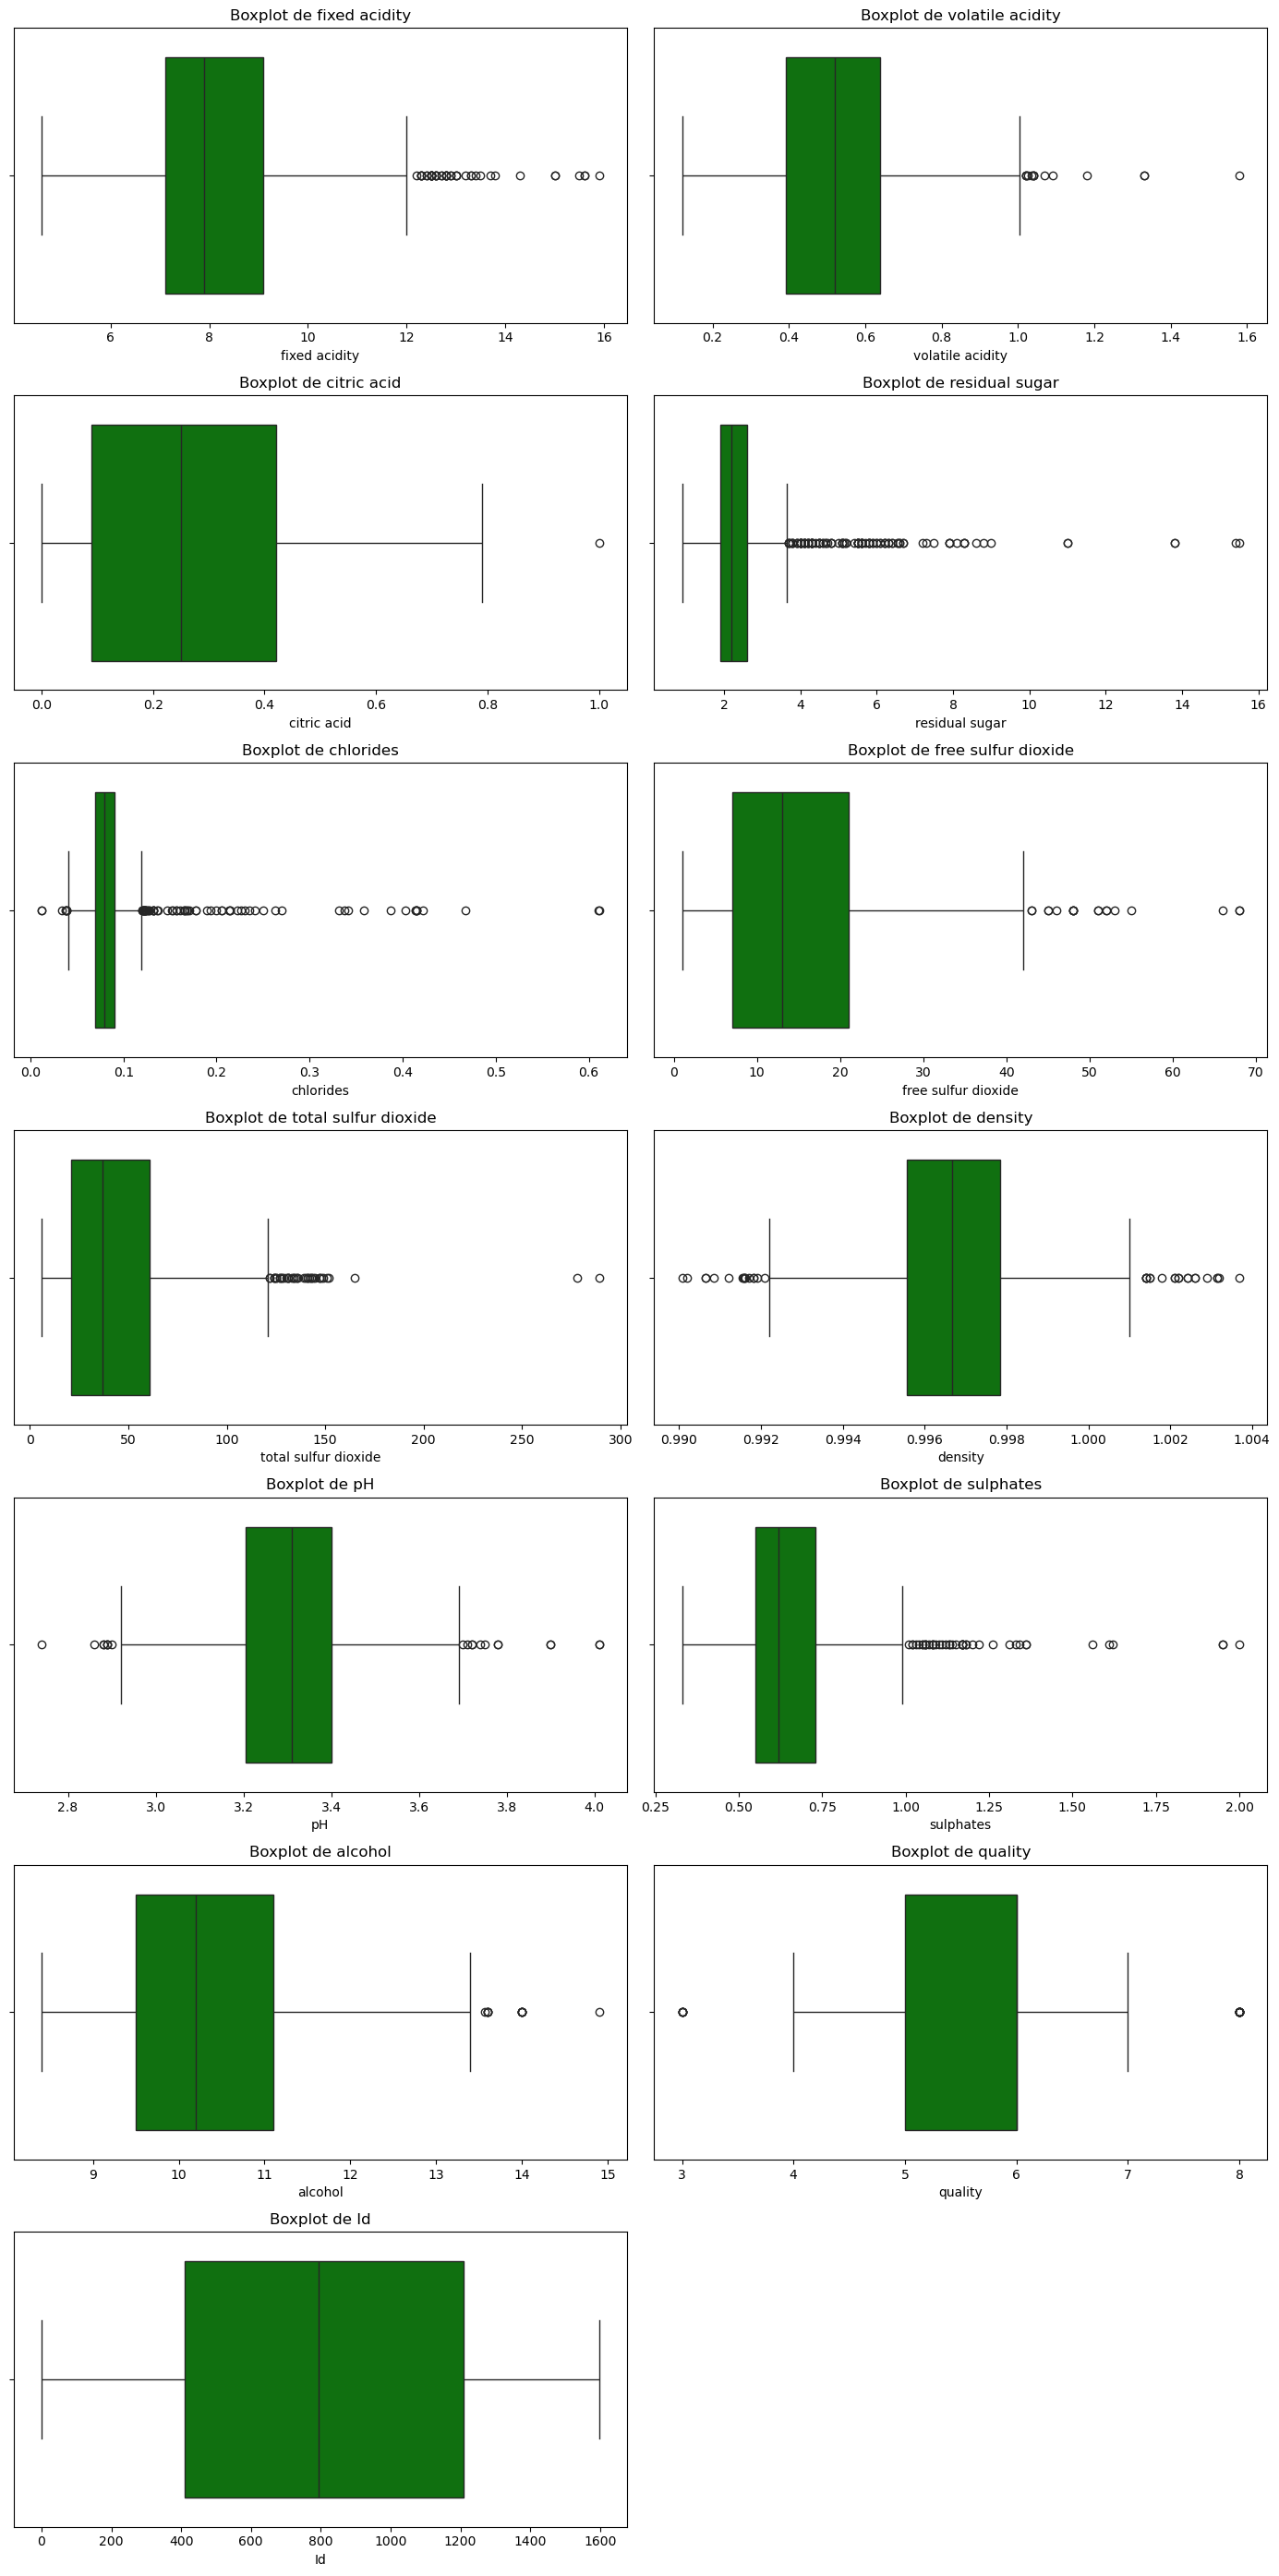

In [ ]:
#  Configurar el número de gráficos por fila
num_cols = 2  # Número de gráficos por fila
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Columnas numéricas
total_cols = len(numerical_columns)

# Histograma de las variables
# Calcula el número de filas necesarias para acomodar todos los gráficos con num_cols gráficos por fila.
fig, axes = plt.subplots(nrows=math.ceil(total_cols / num_cols), ncols=num_cols, figsize=(14, 4 * math.ceil(total_cols / num_cols)))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=30, color='blue', ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

# Ocultar ejes adicionales
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Boxplot de las variables
#Crea un conjunto de ejes (axes) organizados en varias filas y columnas según el número de gráficos.
fig, axes = plt.subplots(nrows=math.ceil(total_cols / num_cols), ncols=num_cols, figsize=(14, 4 * math.ceil(total_cols / num_cols)))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, color='green', ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].set_xlabel(col)

# Ocultar ejes adicionales
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

* Identificar y tratar valores nulos y outliers.

In [10]:
# 1. Identificación de valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [11]:
# 3. Identificación de outliers
outliers = {}  # Diccionario para guardar el número de outliers por columna

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[col].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior
    outliers[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()  # Conteo de outliers
    print(f"Columna {col}: {outliers[col]} outliers identificados.")

# 4. Tratamiento de outliers
# Capping: Reemplazar valores fuera de los límites con los valores de los límites
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Reemplazar outliers con límites
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

print("Outliers tratados con capping (límite inferior/superior).")


Columna fixed acidity: 44 outliers identificados.
Columna volatile acidity: 14 outliers identificados.
Columna citric acid: 1 outliers identificados.
Columna residual sugar: 110 outliers identificados.
Columna chlorides: 77 outliers identificados.
Columna free sulfur dioxide: 18 outliers identificados.
Columna total sulfur dioxide: 40 outliers identificados.
Columna density: 36 outliers identificados.
Columna pH: 20 outliers identificados.
Columna sulphates: 43 outliers identificados.
Columna alcohol: 12 outliers identificados.
Columna quality: 22 outliers identificados.
Columna Id: 0 outliers identificados.
Outliers tratados con capping (límite inferior/superior).


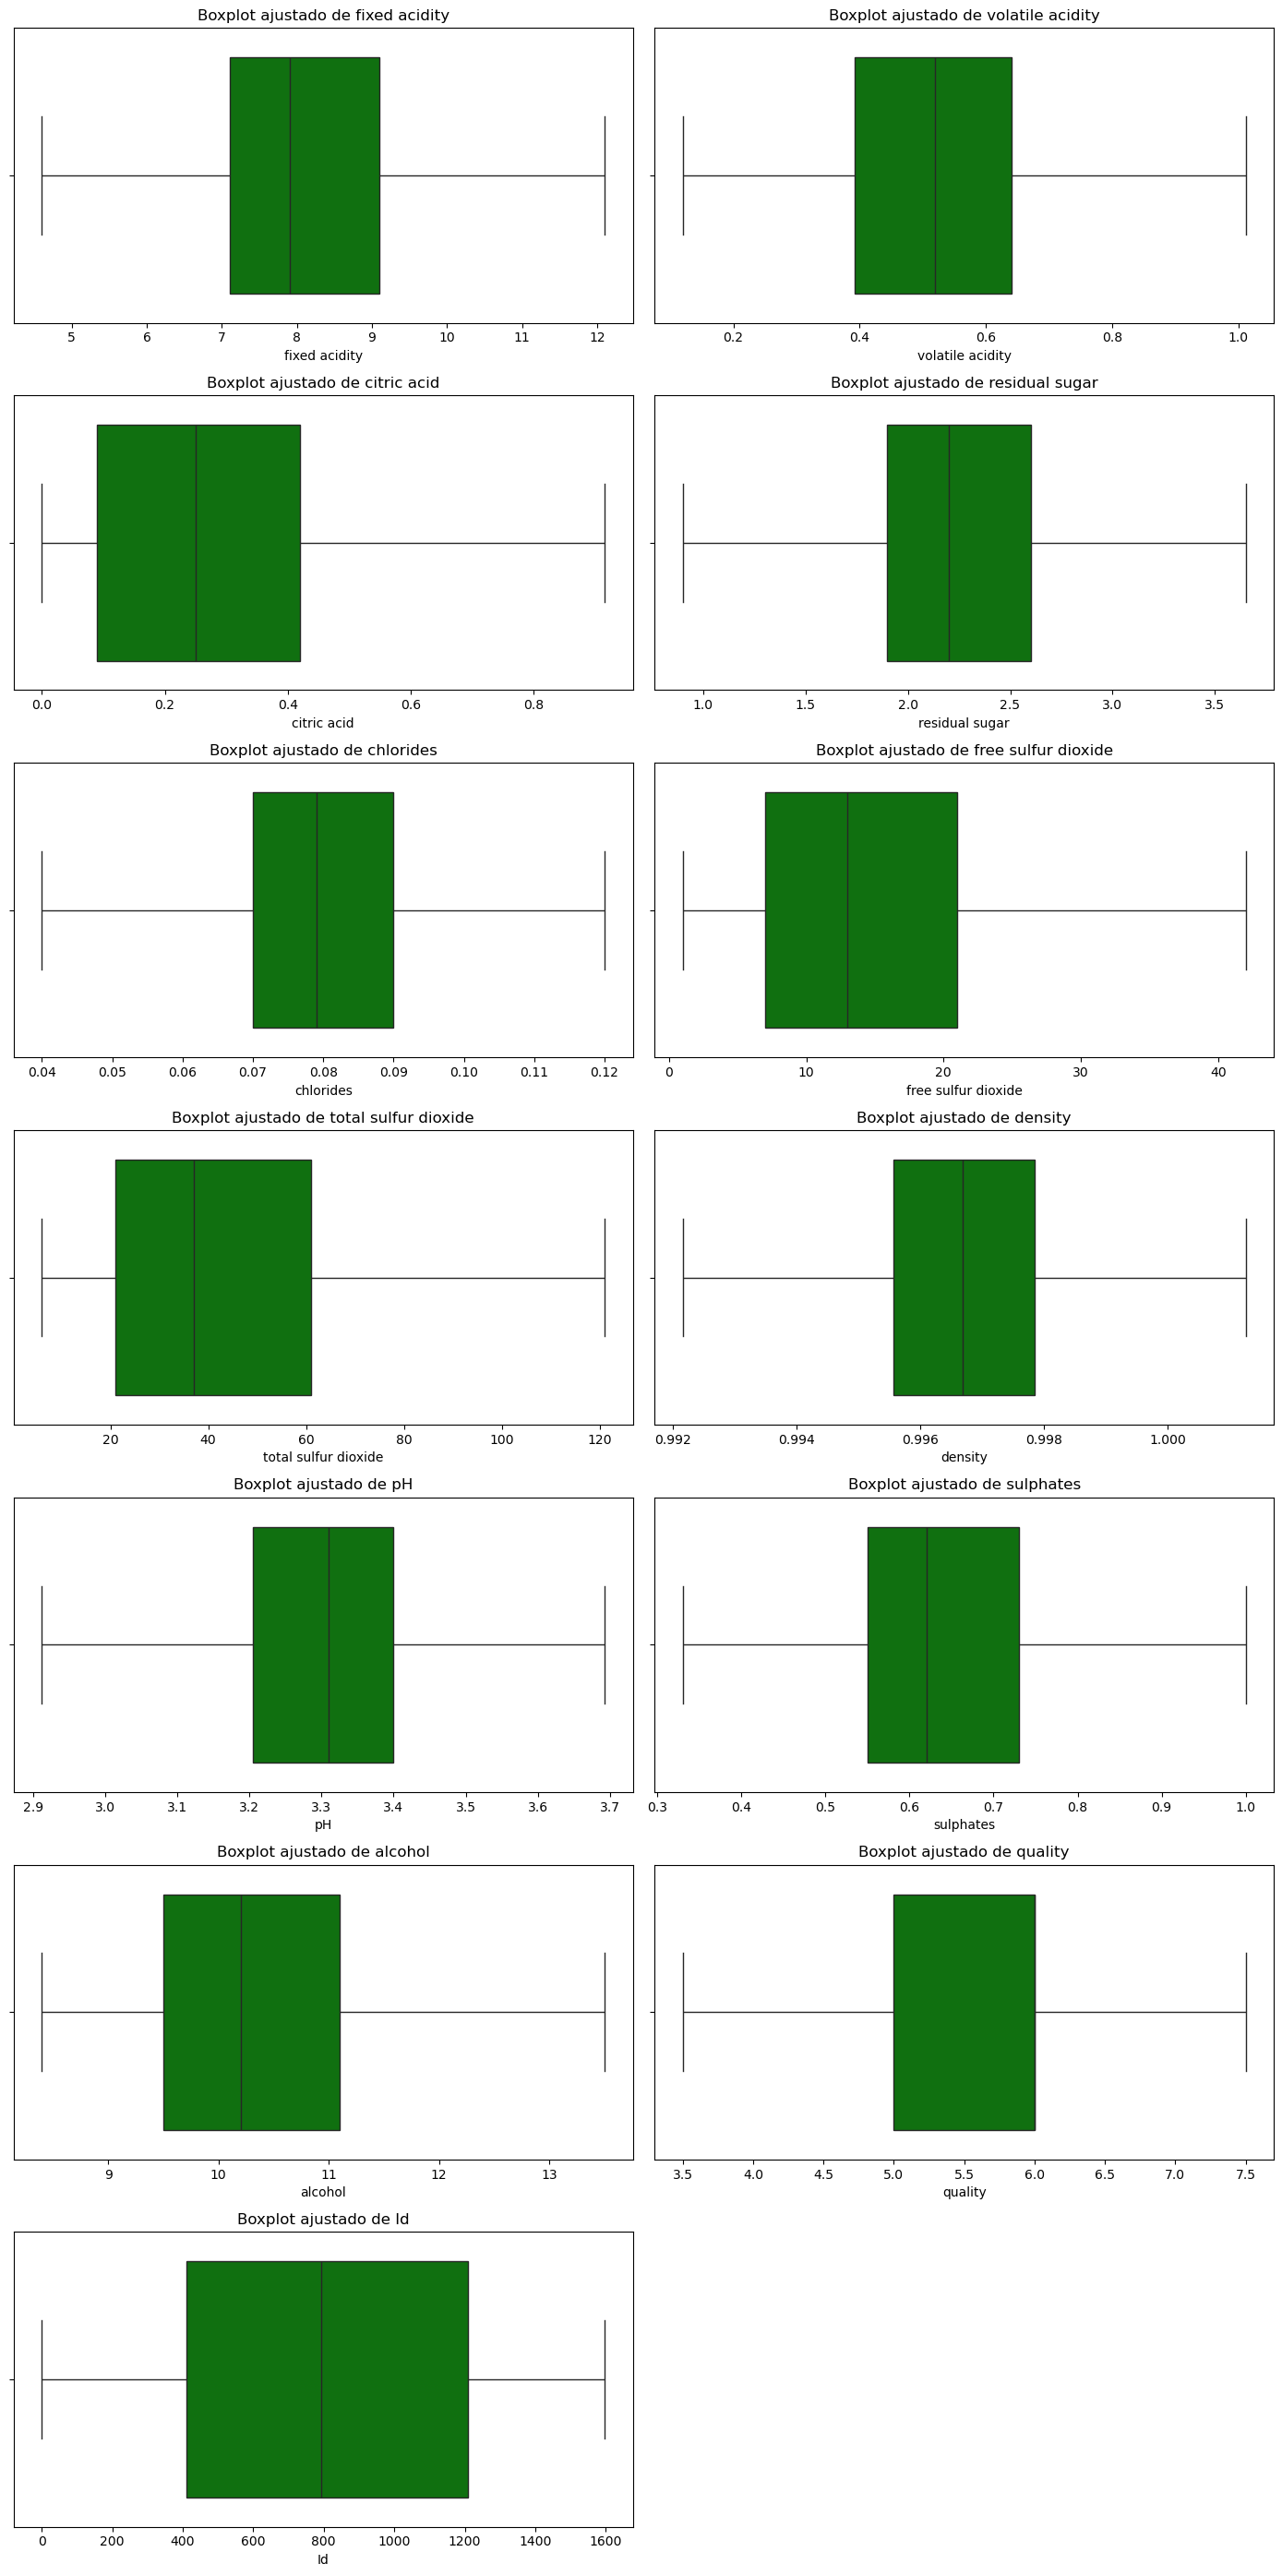

In [13]:
# Configurar el número de gráficos por fila
num_cols = 2  # Número de gráficos por fila
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Seleccionar columnas numéricas
total_cols = len(numerical_columns)  # Total de columnas numéricas

# Crear una cuadrícula de gráficos
fig, axes = plt.subplots(nrows=math.ceil(total_cols / num_cols), ncols=num_cols, figsize=(14, 4 * math.ceil(total_cols / num_cols)))
axes = axes.flatten()  # Convertir la cuadrícula en una lista para iterar fácilmente

# Dibujar un boxplot en cada subgráfico
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, color='green', ax=axes[i])
    axes[i].set_title(f"Boxplot ajustado de {col}")
    axes[i].set_xlabel(col)

# Ocultar ejes vacíos si hay menos gráficos que espacios
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Desactivar ejes vacíos

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()


**2. Preprocesamiento de Datos:**

* Seleccionar características importantes para la clasificación.

* Transformar variables categóricas en variables numéricas si es necesario.

* Dividir los datos en conjuntos de entrenamiento y prueba.

* Escalar las características.


* Seleccionar características importantes para la clasificación.


Importancia de las características según Random Forest Classifier:
alcohol                 0.191198
sulphates               0.128857
volatile acidity        0.110266
total sulfur dioxide    0.098771
density                 0.081154
fixed acidity           0.070620
chlorides               0.069162
pH                      0.068041
citric acid             0.065111
free sulfur dioxide     0.062571
residual sugar          0.054249
dtype: float64


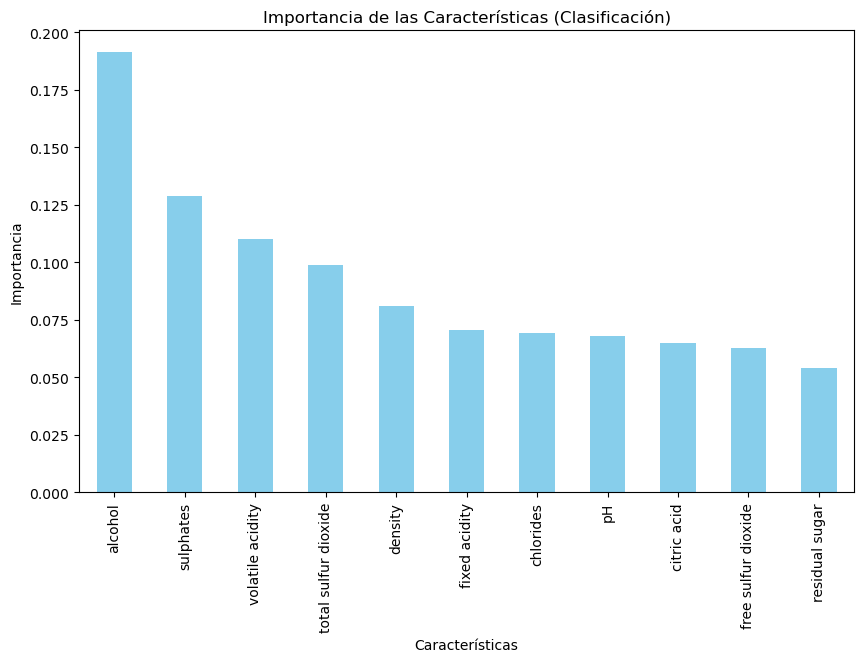

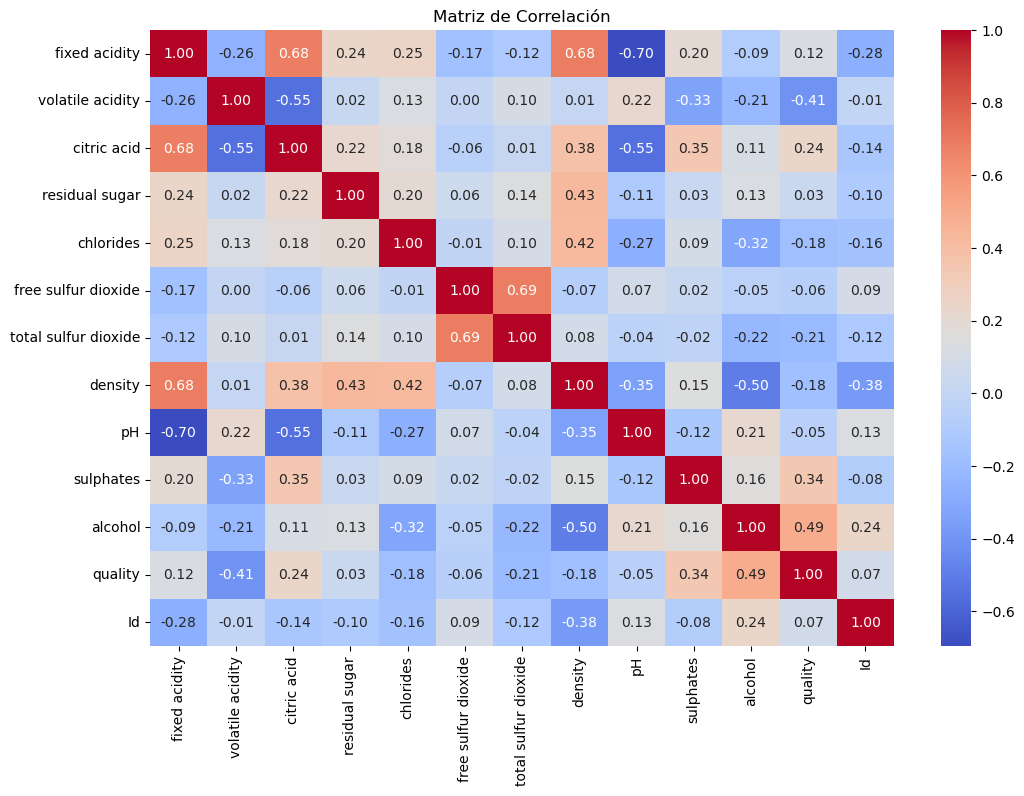

In [17]:
# Paso 1: Crear las categorías para 'quality'
y_categorized = pd.cut(
    df['quality'], bins=[0, 5, 7, 10], labels=['low', 'medium', 'high']
)

# Paso 2: Separar características independientes y objetivo
X = df.drop(columns=["quality", "Id"])  # Excluir 'quality' e 'Id'
y = y_categorized  # Categorías de calidad

# Paso 3: Entrenar un modelo Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Paso 4: Obtener la importancia de las características
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportancia de las características según Random Forest Classifier:")
print(importances)

# Paso 5: Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
importances.plot(kind="bar", color="skyblue")
plt.title("Importancia de las Características (Clasificación)")
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.show()

# Paso 6: Mostrar correlaciones con 'quality'
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

* Transformar variables categóricas en variables numéricas si es necesario.

In [18]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Columnas categóricas:", categorical_columns)


Columnas categóricas: Index([], dtype='object')


* Dividir los datos en conjuntos de entrenamiento y prueba.

In [19]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df.drop(columns=["quality", "Id"])  # Excluir la calidad e identificadores únicos
y = df["quality"]  # Variable objetivo

# Dividir los datos en entrenamiento (train) y prueba (test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Imprimir tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])


Tamaño del conjunto de entrenamiento: 914
Tamaño del conjunto de prueba: 229


* Escalar las características.

In [20]:
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Ajustar y transformar las características de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Usar el mismo escalador para transformar el conjunto de prueba
X_test_scaled = scaler.transform(X_test)

# Verificar la media y desviación estándar
print("Media del conjunto de entrenamiento escalado:", X_train_scaled.mean(axis=0))
print("Desviación estándar del conjunto de entrenamiento escalado:", X_train_scaled.std(axis=0))


Media del conjunto de entrenamiento escalado: [ 3.49829574e-17  6.99659149e-17  3.49829574e-17  3.88699527e-16
 -2.83750655e-16 -3.10959622e-17 -9.81466306e-17 -1.98372804e-14
 -8.66799946e-16  2.64315679e-16 -1.51592816e-15]
Desviación estándar del conjunto de entrenamiento escalado: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**3. Entrenamiento de Modelos de Clasificación:**

* Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).
* Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

Precisión del modelo KNN: 0.6681
Precisión del modelo Random Forest: 0.7598
Precisión del modelo Regresión Logística: 0.7467


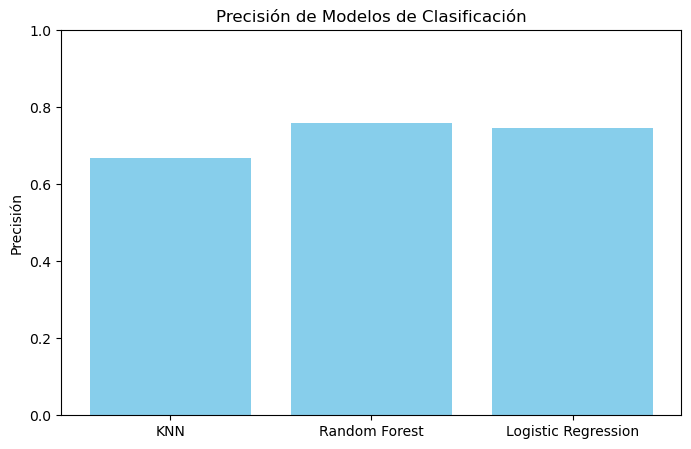

In [25]:
# Importar bibliotecas necesarias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Paso 1: Dividir los datos en entrenamiento y prueba
X = df.drop(columns=["quality", "Id"])  # Características
y = df["quality"]  # Variable objetivo

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Paso 2: Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 3: Categorizar quality en clases (low, medium, high)
y_train_categorized = pd.cut(
    y_train, bins=[0, 5, 7, 10], labels=["low", "medium", "high"]
)
y_test_categorized = pd.cut(
    y_test, bins=[0, 5, 7, 10], labels=["low", "medium", "high"]
)

# Paso 4: Definir los modelos
knn = KNeighborsClassifier(n_neighbors=5)  # KNN con 5 vecinos
random_forest = RandomForestClassifier(random_state=42)  # Random Forest
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)  # Regresión Logística

# Paso 5: Entrenar los modelos
knn.fit(X_train_scaled, y_train_categorized)
random_forest.fit(X_train_scaled, y_train_categorized)
logistic_regression.fit(X_train_scaled, y_train_categorized)

# Paso 6: Hacer predicciones en el conjunto de prueba
knn_preds = knn.predict(X_test_scaled)
rf_preds = random_forest.predict(X_test_scaled)
logreg_preds = logistic_regression.predict(X_test_scaled)

# Paso 7: Calcular la precisión de los modelos
knn_accuracy = accuracy_score(y_test_categorized, knn_preds)
rf_accuracy = accuracy_score(y_test_categorized, rf_preds)
logreg_accuracy = accuracy_score(y_test_categorized, logreg_preds)

# Paso 8: Mostrar los resultados
print(f"Precisión del modelo KNN: {knn_accuracy:.4f}")
print(f"Precisión del modelo Random Forest: {rf_accuracy:.4f}")
print(f"Precisión del modelo Regresión Logística: {logreg_accuracy:.4f}")

# Paso 9: Visualizar la precisión de los modelos
import matplotlib.pyplot as plt

models = ["KNN", "Random Forest", "Logistic Regression"]
accuracies = [knn_accuracy, rf_accuracy, logreg_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color="skyblue")
plt.ylim(0, 1)
plt.title("Precisión de Modelos de Clasificación")
plt.ylabel("Precisión")
plt.show()



In [26]:
from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperparámetros para KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

# Crear el modelo KNN
knn = KNeighborsClassifier()

# Aplicar GridSearchCV con validación cruzada
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train_categorized)

# Mostrar los mejores parámetros y la precisión
print("Mejores hiperparámetros para KNN:", grid_knn.best_params_)
print("Mejor precisión de KNN (CV):", grid_knn.best_score_)


Mejores hiperparámetros para KNN: {'n_neighbors': 11, 'weights': 'distance'}
Mejor precisión de KNN (CV): 0.7515702876358613


In [27]:
# Definir el rango de hiperparámetros para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Crear el modelo Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Aplicar GridSearchCV con validación cruzada
grid_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_scaled, y_train_categorized)

# Mostrar los mejores parámetros y la precisión
print("Mejores hiperparámetros para Random Forest:", grid_rf.best_params_)
print("Mejor precisión de Random Forest (CV):", grid_rf.best_score_)


Mejores hiperparámetros para Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Mejor precisión de Random Forest (CV): 0.772413378970756


**5. Análisis y Comparación de Resultados:**

* Comparar el rendimiento de los diferentes modelos.

* Discutir cuál modelo ofrece el mejor rendimiento y por qué.

* Identificar las fortalezas y debilidades de cada enfoque en este contexto.

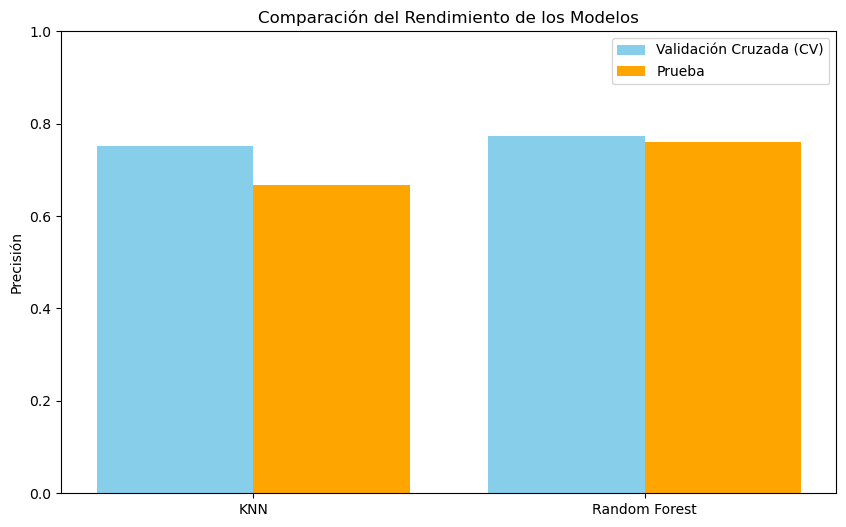

In [28]:
# Resultados de validación cruzada y prueba
models = ["KNN", "Random Forest"]
cv_scores = [0.7516, 0.7724]  # Precisión en validación cruzada (CV)
test_scores = [0.6681, 0.7598]  # Precisión en el conjunto de prueba

# Crear gráfico comparativo
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
x = range(len(models))
plt.bar(x, cv_scores, width=0.4, label="Validación Cruzada (CV)", color="skyblue", align="center")
plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label="Prueba", color="orange", align="center")
plt.xticks([i + 0.2 for i in x], models)
plt.ylim(0, 1)
plt.ylabel("Precisión")
plt.title("Comparación del Rendimiento de los Modelos")
plt.legend()
plt.show()


**Interpretación de los Resultados**
* Validación Cruzada (CV): Random Forest tiene una precisión superior (0.7724 vs. 0.7516), lo que indica que tiene mejor rendimiento promedio en diferentes particiones de los datos.

* Conjunto de Prueba: Random Forest nuevamente supera a KNN (0.7598 vs. 0.6681), mostrando que generaliza mejor a datos no vistos.

**Discutir el Mejor Modelo**

Podemos identificar el modelo con mejor rendimiento basándonos en las métricas observadas.

**Discusión**
* **Modelo Ganador: Random Forest**

    * **Razón:** Random Forest tiene un rendimiento consistentemente superior en validación cruzada y conjunto de prueba.

    * **Ventaja:** Su capacidad para manejar relaciones no lineales entre las características y su resistencia al sobreajuste al combinar múltiples árboles de decisión.

* **Modelo Alternativo: KNN**

    * **Razón:** Aunque tiene un rendimiento inferior, KNN puede ser útil en problemas donde los datos tienen patrones locales claros.

    * **Limitación:** Es sensible a la selección de hiperparámetros como n_neighbors y requiere escalado adecuado para evitar sesgos.

**Identificar Fortalezas y Debilidades**

**Random Forest**

* **Fortalezas:**
    * Robusto a ruido y escalabilidad para datasets grandes.

    * Maneja relaciones no lineales entre características.

    * Evita el sobreajuste debido a la combinación de múltiples árboles.

* **Debilidades:**

    * Es menos interpretable comparado con modelos como Regresión Logística.

    * Puede ser computacionalmente costoso en datasets muy grandes.

**KNN**

* **Fortalezas:**
Modelo intuitivo y fácil de entender.

Útil en problemas donde la proximidad de las características captura la estructura de los datos.

**Debilidades:**

* Sensible a la escala de las características.

* Más lento al predecir en datasets grandes debido a su dependencia en el cálculo de distancias.

* Menos robusto frente a ruido en los datos.